In [165]:
# Import libraries
import pandas as pd
import os
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
# Set Seaborn plot figure size
sns.set(rc = {'figure.figsize' : (14, 10)})

In [9]:
# Set root file path and collect all file names
all_files = list()
file_root_path = r'Hexoskin data updated'
folders = os.listdir(file_root_path)
for folder in folders:
    path = file_root_path + '/' + folder
    files = os.listdir(path)
    complete_path_temp = [path + '/' + file + '/outputDataParsed.csv' for file in files]
    all_files.extend(complete_path_temp)

In [49]:
# Check if all files are included
all_files

['Hexoskin data updated/Session 10/Part 3 record_219657/outputDataParsed.csv',
 'Hexoskin data updated/Session 11/Part 1 record_227504/outputDataParsed.csv',
 'Hexoskin data updated/Session 11/Part 2 record_227673/outputDataParsed.csv',
 'Hexoskin data updated/Session 11/Part 3 record_22658/outputDataParsed.csv',
 'Hexoskin data updated/Session 12/Part 1 record_220701/outputDataParsed.csv',
 'Hexoskin data updated/Session 12/Part 3 record_221243/outputDataParsed.csv',
 'Hexoskin data updated/Session 13/Part 1 record_221244/outputDataParsed.csv',
 'Hexoskin data updated/Session 13/Part 2 record_222536/outputDataParsed.csv',
 'Hexoskin data updated/Session 13/Part 3 record_221488/outputDataParsed.csv',
 'Hexoskin data updated/Session 14/Part 1 record_221604/outputDataParsed.csv',
 'Hexoskin data updated/Session 14/Part 2 record_222539/outputDataParsed.csv',
 'Hexoskin data updated/Session 14/Part 3 record_222127/outputDataParsed.csv',
 'Hexoskin data updated/Session 15/Part 1 record_2221

In [64]:
# Create file dictionary (e.g. 12.1 --> Session 12 Part 1)
file_dict = dict()
for all_file in all_files:
    file_dict[float(all_file[22:39].replace('Session ', '').replace('/Part ', '.').strip())] = all_file

In [65]:
# Check file directory
file_dict

{10.3: 'Hexoskin data updated/Session 10/Part 3 record_219657/outputDataParsed.csv',
 11.1: 'Hexoskin data updated/Session 11/Part 1 record_227504/outputDataParsed.csv',
 11.2: 'Hexoskin data updated/Session 11/Part 2 record_227673/outputDataParsed.csv',
 11.3: 'Hexoskin data updated/Session 11/Part 3 record_22658/outputDataParsed.csv',
 12.1: 'Hexoskin data updated/Session 12/Part 1 record_220701/outputDataParsed.csv',
 12.3: 'Hexoskin data updated/Session 12/Part 3 record_221243/outputDataParsed.csv',
 13.1: 'Hexoskin data updated/Session 13/Part 1 record_221244/outputDataParsed.csv',
 13.2: 'Hexoskin data updated/Session 13/Part 2 record_222536/outputDataParsed.csv',
 13.3: 'Hexoskin data updated/Session 13/Part 3 record_221488/outputDataParsed.csv',
 14.1: 'Hexoskin data updated/Session 14/Part 1 record_221604/outputDataParsed.csv',
 14.2: 'Hexoskin data updated/Session 14/Part 2 record_222539/outputDataParsed.csv',
 14.3: 'Hexoskin data updated/Session 14/Part 3 record_222127/outp

In [70]:
# Sort the files collected by Session # and Part #
records_in_order = list()
for key, item in sorted(file_dict.items()):
    records_in_order.append(item)

In [74]:
# Collect the starting time for each file
activity_start_time = list()
for record in records_in_order:
    with open(record, newline = '') as file:
        reader = csv.reader(file, delimiter = ',')
        col_name_line = next(reader)
        row_1 = next(reader)
        activity_start_time.append(row_1[0])

In [75]:
# Check starting time
activity_start_time

['2021-08-04 23:08:11:484375',
 '2021-08-05 09:10:09:101562',
 '2021-08-06 07:51:30:042969',
 '2021-08-07 23:48:39:281250',
 '2021-08-08 08:53:46:308594',
 '2021-08-09 08:46:29:152344',
 '2021-08-09 18:36:03:207031',
 '2021-08-09 19:28:59:964844',
 '2021-01-30 23:12:55:585938',
 '2021-01-31 08:56:45:910156',
 '2021-02-01 08:40:08:343750',
 '2021-02-15 23:02:25:199219',
 '2021-02-16 09:40:05:156250',
 '2021-02-17 11:03:54:808594',
 '2021-03-01 23:01:28:304688',
 '2021-03-02 08:55:42:265625',
 '2021-03-03 09:06:00:585938',
 '2021-03-08 23:02:49:191406',
 '2021-03-09 08:31:48:687500',
 '2021-03-10 08:55:08:675781',
 '2021-03-19 23:06:46:281250',
 '2021-03-20 08:46:05:027344',
 '2021-03-21 09:01:41:074219',
 '2021-08-11 23:13:04:406250',
 '2021-08-12 08:48:40:070312',
 '2021-08-13 08:13:35:851562',
 '2021-04-04 09:34:37:339844',
 '2021-08-17 23:51:24:710938',
 '2021-08-18 09:54:44:636719',
 '2021-08-19 08:36:55:425781',
 '2021-04-30 23:01:05:269531',
 '2021-05-02 09:42:06:316406',
 '2021-0

In [113]:
# Stack all the dataframe together into total_data
total_data = pd.DataFrame()
for record in records_in_order:
    df = pd.read_csv(record, sep = ',')
    total_data = pd.concat(objs = [total_data, df], ignore_index = True)

In [114]:
# Rename the columns
total_data = total_data.rename(columns = {'time [s]' : 'date_time', 
                                          'heart_rate [bpm] (/api/datatype/19/)' : 'heart_rate', 
                                          'breathing_rate [rpm] (/api/datatype/33/)' : 'breathing_rate',
                                          'cadence [spm] (/api/datatype/53/)cadence [spm] (/api/datatype/53/)' : 'cadence'
                                         })

In [115]:
# Split the timestamp into date and time for easy filtering
total_data[['date', 'time']] = total_data['date_time'].str.split(' ', 1, expand = True)

In [116]:
# Only keep 'hh/mm/ss' for the 'time' column
total_data['time'] = total_data['time'].apply(lambda x: x[:8])

In [119]:
# Rearrange column orders
total_data = total_data[['date', 'time', 'heart_rate', 'breathing_rate', 'cadence', 'date_time']]

In [120]:
# Change data types
total_data['heart_rate'] = total_data['heart_rate'].astype('int')
total_data['breathing_rate'] = total_data['breathing_rate'].astype('int')
total_data['cadence'] = total_data['cadence'].astype('int')

In [123]:
# Check dataset
total_data

,date,time,heart_rate,breathing_rate,cadence,date_time
0,2021-08-04,23:08:11,70,10,0,2021-08-04 23:08:11:484375
1,2021-08-04,23:08:12,70,10,0,2021-08-04 23:08:12:484375
2,2021-08-04,23:08:13,70,10,0,2021-08-04 23:08:13:484375
3,2021-08-04,23:08:14,70,10,0,2021-08-04 23:08:14:484375
4,2021-08-04,23:08:15,70,14,0,2021-08-04 23:08:15:484375
...,...,...,...,...,...,...
4576773,2021-07-18,23:06:01,87,14,0,2021-07-18 23:06:01:148438
4576774,2021-07-18,23:06:02,87,16,0,2021-07-18 23:06:02:148438
4576775,2021-07-18,23:06:03,87,17,0,2021-07-18 23:06:03:148438
4576776,2021-07-18,23:06:04,87,18,0,2021-07-18 23:06:04:148438


In [130]:
# Data sorted by date and time
total_data = total_data.sort_values(['date', 'time']).reset_index(drop = True)

In [138]:
# Change datetime data type
total_data['date'] = pd.to_datetime(total_data['date'], format = '%Y-%m-%d')

In [140]:
# Permutation period mask
mask_per1 = (((total_data['date'] >= '2021-07-25') & (total_data['date'] <= '2021-07-27')) |
        ((total_data['date'] >= '2021-01-30') & (total_data['date'] <= '2021-02-01')) | 
        ((total_data['date'] >= '2021-03-08') & (total_data['date'] <= '2021-03-10')) |
        ((total_data['date'] >= '2021-04-02') & (total_data['date'] <= '2021-04-04')) |
        ((total_data['date'] >= '2021-05-07') & (total_data['date'] <= '2021-05-09')) |
        ((total_data['date'] >= '2021-05-18') & (total_data['date'] <= '2021-05-20')) |
        ((total_data['date'] >= '2021-05-30') & (total_data['date'] <= '2021-06-01')) |
        ((total_data['date'] >= '2021-08-20') & (total_data['date'] <= '2021-08-23')) |
        ((total_data['date'] >= '2021-06-24') & (total_data['date'] <= '2021-06-26')) |
        ((total_data['date'] >= '2021-07-12') & (total_data['date'] <= '2021-07-14')))

In [146]:
# Filter out dataframe based on mask
per1_df = total_data[mask_per1].reset_index(drop = True)
per1_df

,date,time,heart_rate,breathing_rate,cadence,date_time
0,2021-01-30,23:12:55,70,10,0,2021-01-30 23:12:55:585938
1,2021-01-30,23:12:56,70,10,0,2021-01-30 23:12:56:585938
2,2021-01-30,23:12:57,70,10,0,2021-01-30 23:12:57:585938
3,2021-01-30,23:12:58,70,10,0,2021-01-30 23:12:58:585938
4,2021-01-30,23:12:59,70,10,0,2021-01-30 23:12:59:585938
...,...,...,...,...,...,...
1392284,2021-08-22,23:17:19,74,2,0,2021-08-22 23:17:19:609375
1392285,2021-08-22,23:17:20,74,2,0,2021-08-22 23:17:20:609375
1392286,2021-08-22,23:17:21,74,2,0,2021-08-22 23:17:21:609375
1392287,2021-08-22,23:17:22,74,2,52,2021-08-22 23:17:22:609375


In [159]:
# Mask list
masks_per1 = [((total_data['date'] >= '2021-07-25') & (total_data['date'] <= '2021-07-27')) ,
        ((total_data['date'] >= '2021-01-30') & (total_data['date'] <= '2021-02-01')) ,
        ((total_data['date'] >= '2021-03-08') & (total_data['date'] <= '2021-03-10')) ,
        ((total_data['date'] >= '2021-04-02') & (total_data['date'] <= '2021-04-04')) ,
        ((total_data['date'] >= '2021-05-07') & (total_data['date'] <= '2021-05-09')) ,
        ((total_data['date'] >= '2021-05-18') & (total_data['date'] <= '2021-05-20')) ,
        ((total_data['date'] >= '2021-05-30') & (total_data['date'] <= '2021-06-01')) ,
        ((total_data['date'] >= '2021-08-20') & (total_data['date'] <= '2021-08-23')) ,
        ((total_data['date'] >= '2021-06-24') & (total_data['date'] <= '2021-06-26')) ,
        ((total_data['date'] >= '2021-07-12') & (total_data['date'] <= '2021-07-14'))]

In [170]:
# create a new df for plotting
i = 1
per1_plot_df = pd.DataFrame()
for mask in masks_per1:
    per1_plot_df['permutation 1_' + str(i)] = total_data[mask]['heart_rate'].reset_index(drop=True)
    i += 1

In [171]:
# new df
per1_plot_df

,permutation 1_1,permutation 1_2,permutation 1_3,permutation 1_4,permutation 1_5,permutation 1_6,permutation 1_7,permutation 1_8,permutation 1_9,permutation 1_10
0,NaN,70,70,70.0,70,70.0,70,70,70,70
1,NaN,70,70,70.0,70,70.0,70,70,70,70
2,NaN,70,70,70.0,70,70.0,70,70,70,70
3,NaN,70,70,70.0,70,70.0,70,70,70,70
4,NaN,70,70,70.0,70,70.0,70,70,70,70
...,...,...,...,...,...,...,...,...,...,...
169758,NaN,98,86,NaN,71,NaN,80,65,134,67
169759,NaN,98,80,NaN,76,NaN,81,65,134,67
169760,NaN,98,72,NaN,78,NaN,82,65,134,63
169761,NaN,98,72,NaN,78,NaN,82,65,133,60


<AxesSubplot:>

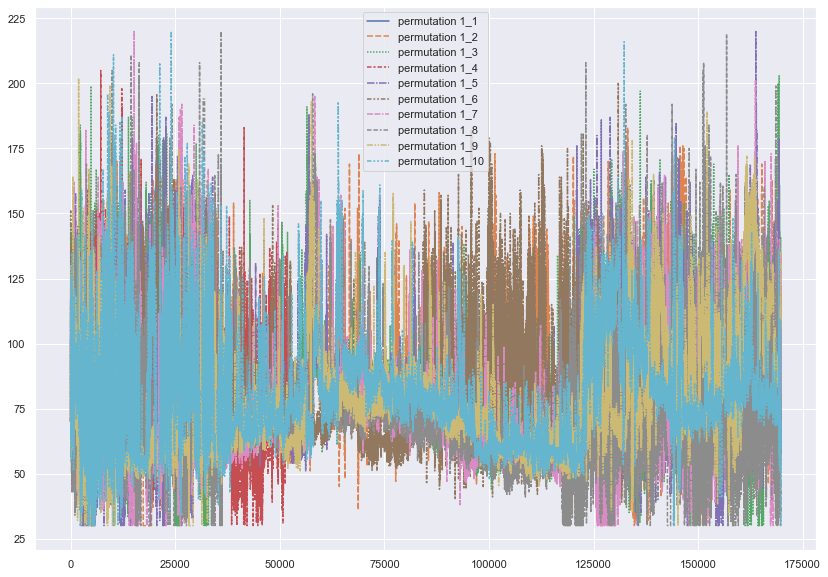

In [173]:
# Plot for permutation 1
sns.lineplot(data = per1_plot_df)

In [148]:
# mask for permutation 2
mask_per2 = (((total_data['date'] >= '2021-08-04') & (total_data['date'] <= '2021-08-06')) |
        ((total_data['date'] >= '2021-02-15') & (total_data['date'] <= '2021-02-17')) | 
        ((total_data['date'] >= '2021-03-19') & (total_data['date'] <= '2021-03-21')) |
        ((total_data['date'] >= '2021-08-17') & (total_data['date'] <= '2021-08-19')) |
        ((total_data['date'] >= '2021-05-11') & (total_data['date'] <= '2021-05-13')) |
        ((total_data['date'] >= '2021-05-22') & (total_data['date'] <= '2021-05-24')) |
        ((total_data['date'] >= '2021-06-02') & (total_data['date'] <= '2021-06-04')) |
        ((total_data['date'] >= '2021-06-17') & (total_data['date'] <= '2021-06-19')) |
        ((total_data['date'] >= '2021-07-05') & (total_data['date'] <= '2021-07-08')) |
        ((total_data['date'] >= '2021-07-21') & (total_data['date'] <= '2021-07-23')))

In [150]:
# permutation 2 dataframe
per2_df = total_data[mask_per2].reset_index(drop = True)
per2_df

,date,time,heart_rate,breathing_rate,cadence,date_time
0,2021-02-15,23:02:25,70,10,0,2021-02-15 23:02:25:199219
1,2021-02-15,23:02:26,70,10,0,2021-02-15 23:02:26:199219
2,2021-02-15,23:02:27,70,10,0,2021-02-15 23:02:27:199219
3,2021-02-15,23:02:28,70,10,0,2021-02-15 23:02:28:199219
4,2021-02-15,23:02:29,70,10,0,2021-02-15 23:02:29:199219
...,...,...,...,...,...,...
1547592,2021-08-19,22:55:27,110,4,0,2021-08-19 22:55:27:425781
1547593,2021-08-19,22:55:28,110,4,0,2021-08-19 22:55:28:425781
1547594,2021-08-19,22:55:29,110,4,0,2021-08-19 22:55:29:425781
1547595,2021-08-19,22:55:30,110,3,0,2021-08-19 22:55:30:425781


In [176]:
# permutation 2 mask list
masks_per2 = [((total_data['date'] >= '2021-08-04') & (total_data['date'] <= '2021-08-06')) ,
        ((total_data['date'] >= '2021-02-15') & (total_data['date'] <= '2021-02-17')) , 
        ((total_data['date'] >= '2021-03-19') & (total_data['date'] <= '2021-03-21')) ,
        ((total_data['date'] >= '2021-08-17') & (total_data['date'] <= '2021-08-19')) ,
        ((total_data['date'] >= '2021-05-11') & (total_data['date'] <= '2021-05-13')) ,
        ((total_data['date'] >= '2021-05-22') & (total_data['date'] <= '2021-05-24')) ,
        ((total_data['date'] >= '2021-06-02') & (total_data['date'] <= '2021-06-04')) ,
        ((total_data['date'] >= '2021-06-17') & (total_data['date'] <= '2021-06-19')) ,
        ((total_data['date'] >= '2021-07-05') & (total_data['date'] <= '2021-07-08')) ,
        ((total_data['date'] >= '2021-07-21') & (total_data['date'] <= '2021-07-23'))]

In [177]:
# create new df for permutation 2
i = 1
per2_plot_df = pd.DataFrame()
for mask in masks_per2:
    per2_plot_df['permutation 2_' + str(i)] = total_data[mask]['heart_rate'].reset_index(drop=True)
    i += 1

In [178]:
# new df
per2_plot_df

,permutation 2_1,permutation 2_2,permutation 2_3,permutation 2_4,permutation 2_5,permutation 2_6,permutation 2_7,permutation 2_8,permutation 2_9,permutation 2_10
0,70,70,70.0,70.0,70.0,70.0,70.0,70,70.0,NaN
1,70,70,70.0,70.0,70.0,70.0,70.0,70,70.0,NaN
2,70,70,70.0,70.0,70.0,70.0,70.0,70,70.0,NaN
3,70,70,70.0,70.0,70.0,70.0,70.0,70,70.0,NaN
4,70,70,70.0,70.0,70.0,70.0,70.0,70,70.0,NaN
...,...,...,...,...,...,...,...,...,...,...
172485,129,71,NaN,NaN,NaN,NaN,NaN,82,NaN,NaN
172486,129,71,NaN,NaN,NaN,NaN,NaN,82,NaN,NaN
172487,129,72,NaN,NaN,NaN,NaN,NaN,82,NaN,NaN
172488,129,72,NaN,NaN,NaN,NaN,NaN,73,NaN,NaN


<AxesSubplot:>

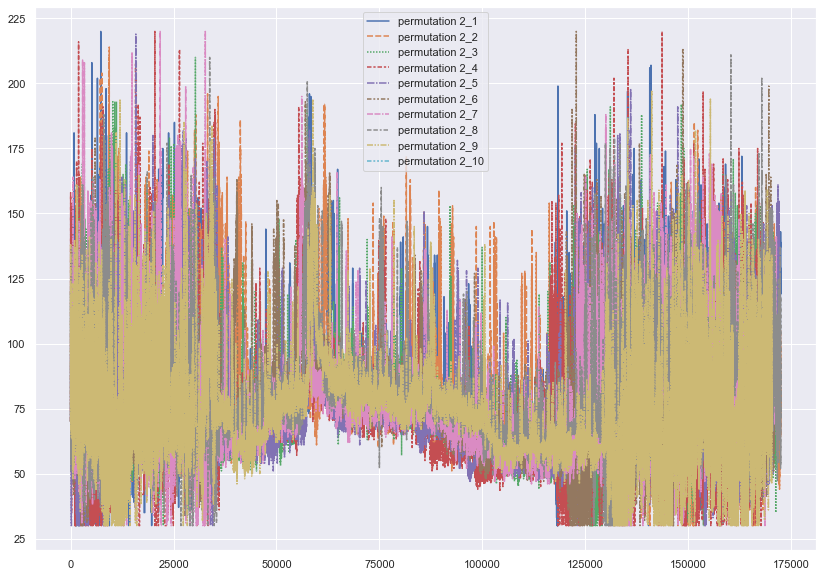

In [180]:
# Line plot for permutation 2
sns.lineplot(data = per2_plot_df)

In [151]:
# Mask for permutation 3 dataframe
mask_per3 = (((total_data['date'] >= '2021-08-07') & (total_data['date'] <= '2021-08-09')) |
        ((total_data['date'] >= '2021-03-01') & (total_data['date'] <= '2021-03-03')) | 
        ((total_data['date'] >= '2021-08-11') & (total_data['date'] <= '2021-08-13')) |
        ((total_data['date'] >= '2021-04-30') & (total_data['date'] <= '2021-05-02')) |
        ((total_data['date'] >= '2021-05-15') & (total_data['date'] <= '2021-05-17')) |
        ((total_data['date'] >= '2021-05-26') & (total_data['date'] <= '2021-05-28')) |
        ((total_data['date'] >= '2021-06-06') & (total_data['date'] <= '2021-06-08')) |
        ((total_data['date'] >= '2021-06-21') & (total_data['date'] <= '2021-06-23')) |
        ((total_data['date'] >= '2021-06-30') & (total_data['date'] <= '2021-07-02')) |
        ((total_data['date'] >= '2021-07-16') & (total_data['date'] <= '2021-07-18')))

In [152]:
# create new df for permutation 3
per3_df = total_data[mask_per3].reset_index(drop = True)
per3_df

,date,time,heart_rate,breathing_rate,cadence,date_time
0,2021-03-01,23:01:28,70,10,0,2021-03-01 23:01:28:304688
1,2021-03-01,23:01:29,70,10,0,2021-03-01 23:01:29:304688
2,2021-03-01,23:01:30,70,10,0,2021-03-01 23:01:30:304688
3,2021-03-01,23:01:31,70,10,0,2021-03-01 23:01:31:304688
4,2021-03-01,23:01:32,70,16,0,2021-03-01 23:01:32:304688
...,...,...,...,...,...,...
1632198,2021-08-13,23:13:47,44,20,0,2021-08-13 23:13:47:851562
1632199,2021-08-13,23:13:48,44,20,0,2021-08-13 23:13:48:851562
1632200,2021-08-13,23:13:49,44,20,0,2021-08-13 23:13:49:851562
1632201,2021-08-13,23:13:50,44,21,0,2021-08-13 23:13:50:851562


In [181]:
# Create mask list for filtering to create dataframe for permutation 3
masks_per3 = [((total_data['date'] >= '2021-08-07') & (total_data['date'] <= '2021-08-09')) ,
        ((total_data['date'] >= '2021-03-01') & (total_data['date'] <= '2021-03-03')) , 
        ((total_data['date'] >= '2021-08-11') & (total_data['date'] <= '2021-08-13')) ,
        ((total_data['date'] >= '2021-04-30') & (total_data['date'] <= '2021-05-02')) ,
        ((total_data['date'] >= '2021-05-15') & (total_data['date'] <= '2021-05-17')) ,
        ((total_data['date'] >= '2021-05-26') & (total_data['date'] <= '2021-05-28')) ,
        ((total_data['date'] >= '2021-06-06') & (total_data['date'] <= '2021-06-08')) ,
        ((total_data['date'] >= '2021-06-21') & (total_data['date'] <= '2021-06-23')) ,
        ((total_data['date'] >= '2021-06-30') & (total_data['date'] <= '2021-07-02')) ,
        ((total_data['date'] >= '2021-07-16') & (total_data['date'] <= '2021-07-18'))]

In [182]:
# create new dataframe for permutation 3
i = 1
per3_plot_df = pd.DataFrame()
for mask in masks_per3:
    per3_plot_df['permutation 3_' + str(i)] = total_data[mask]['heart_rate'].reset_index(drop=True)
    i += 1

In [183]:
# new df
per3_plot_df

,permutation 3_1,permutation 3_2,permutation 3_3,permutation 3_4,permutation 3_5,permutation 3_6,permutation 3_7,permutation 3_8,permutation 3_9,permutation 3_10
0,70,70,70,70.0,70,70,70,70,70,70
1,70,70,70,70.0,70,70,70,70,70,70
2,70,70,70,70.0,70,70,70,70,70,70
3,70,70,70,70.0,70,70,70,70,70,70
4,70,70,70,70.0,70,70,70,70,70,70
...,...,...,...,...,...,...,...,...,...,...
168477,67,107,76,NaN,114,82,63,70,90,75
168478,67,107,85,NaN,113,80,63,68,90,71
168479,67,106,85,NaN,116,80,64,68,83,71
168480,67,101,94,NaN,116,75,64,66,82,70


<AxesSubplot:>

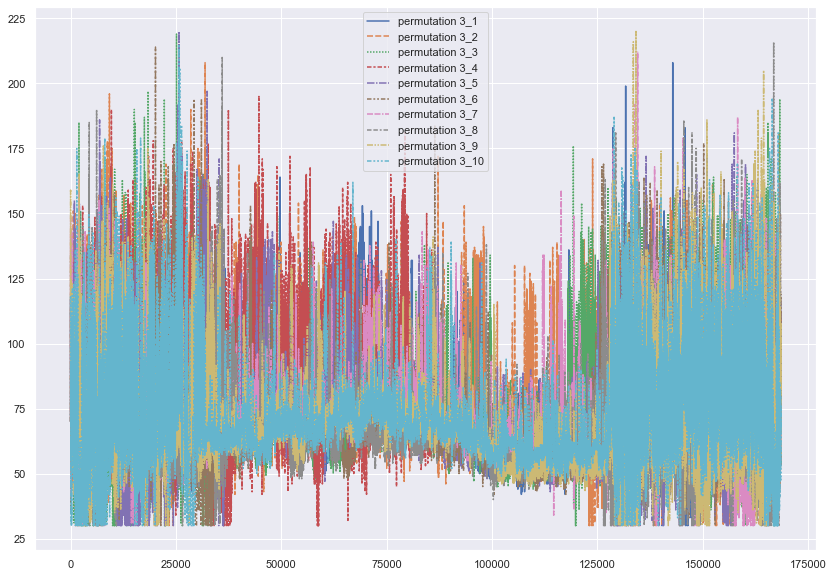

In [185]:
# lineplot for permutation 3
sns.lineplot(data = per3_plot_df)